# 支持向量机

支持向量机(support vector machines,SVM)是一种二分类模型，它的基本类型是定义在特征空间上的间隔最大的线性分类器。支持向量机可以通过核技巧，转换成非线性分类器。

支持向量机方法包括：
线性可分支持向量机、线性支持向量机以及非线性支持向量机。

当数据线性可分时，通过硬间隔最大化学习一个线性分类器，即线性可分支持向量机，或硬间隔支持向量机；

当训练数据近似线性可分时，可通过软间隔最大化学习一个线性分类器，即线性支持向量机，或软间隔支持向量机；

当训练数据线性不可分时，通过使用核技巧和软间隔最大化，学习非线性支持向量机。

## 定义 线性可分支持向量机

给定线性可分训练数据集，通过间隔最大化或等价地求解相应的凸二次规划问题学习得到的分离超平面为：
$$w^{*} \cdot x+b^{*}=0$$
以及相应的分类决策函数：
$$f(x)=\operatorname{sign(w^{*}} \cdot x+b^{*})$$
即称为线性可分支持向量机.

## 线性可分支持向量机学习算法--最大间隔法

输入：线性可分训练数据集$T=\{(x_1,y_1),(x_2,y_2),...,(x_N,y_N)\}$,其中$\mathcal{X}=\mathcal{R}^{n},y_i \in \mathcal{Y}=\{-1,+1\},i=1,2,...,N$;

输出：最大间隔分离超平面和分类决策函数.

(1)构造并求解约束最优化问题:
$${\min_{w,b} \frac{1}{2}\|w\|^{2}}$$
$${s.t \quad y_i(w \cdot x_i+b)-1 \geqslant 0,\quad i=1,2,...,N}$$
求得最优解$w^{*},b^{*}$.得到线性可分支持向量机。

(2)由此得到分离超平面：
$$w^{*} \cdot x+b^{*}=0$$

分类决策函数为:
$$f(x)=\operatorname{sign}(w^{*} \cdot x+b^{*})$$

测试:点(-12.049683112728168,-7.603761697999572) 所属类别[0]
测试:点(0.8870355525538931,-11.343273069697052) 所属类别[0]
测试:点(1.4185775657388977,6.136302608536674) 所属类别[1]
测试:点(-1.4145028437630018,-8.342900961520543) 所属类别[0]
测试:点(-6.906413173015704,9.755837072300153) 所属类别[1]
测试:点(-8.556374090948115,12.189818269242974) 所属类别[1]
测试:点(-4.8828809017757235,-8.986074553085254) 所属类别[0]
测试:点(-19.041308441855065,2.9467991965846374) 所属类别[0]
测试:点(1.8023912758383522,-12.35761077998512) 所属类别[0]
测试:点(10.420647137782703,12.181128138187358) 所属类别[1]
测试:点(18.815792275409063,2.9270951680292305) 所属类别[1]
测试:点(2.1579437355950817,-7.652131623693609) 所属类别[0]
测试:点(-12.598480184633054,-12.622265230469356) 所属类别[0]
测试:点(-13.873743165518286,3.448098307003039) 所属类别[0]
测试:点(9.23445041133019,4.3087809327285855) 所属类别[1]
测试:点(-9.230758262101821,3.618998331805243) 所属类别[0]
测试:点(-7.5917306826675315,10.513401955141596) 所属类别[1]
测试:点(-6.992643598035814,15.090435770812949) 所属类别[1]
测试:点(2.108597285935266,8.58357778464915) 所属类别[1]
测试:点(18.9358

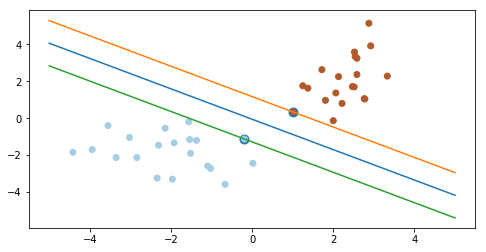

In [2]:
from sklearn import svm
import numpy as np
import matplotlib.pyplot as plt

# 构建正态分布来产生数字,20行2列*2
train_x = np.r_[np.random.randn(20, 2) - [2, 2], np.random.randn(20, 2) + [2, 2]]  

# 构建 20个class0，20个class1
label_y = [0] * 20 + [1] * 20 

# svm设置：
clf = svm.SVC(kernel='linear')
clf.fit(train_x, label_y)

# 获取weights
weights = clf.coef_[0]

rate = -weights[0] / weights[1]  # 斜率
# 画图划线
xx = np.linspace(-5, 5)  # (-5,5)之间x的值
yy = rate * xx - (clf.intercept_[0]) /weights[1]  # xx带入y，截距

# 画出与点相切的线
b = clf.support_vectors_[0]
#yy_down 是线 yy的下边的边界线
yy_down = rate * xx + (b[1] - rate* b[0])
b = clf.support_vectors_[-1]
#yy_up 是线 yy的上边的边界线
yy_up =rate * xx + (b[1] - rate * b[0])


# 测试
for i in range(20):
    test_x = np.random.randn(1, 2) * 10
    print('测试:点({},{}) 所属类别{}'.format(test_x[0][0],test_x[0][1], clf.predict(test_x)))

plt.figure(figsize=(8, 4))
plt.plot(xx, yy)
#绘制左上角的线
plt.plot(xx, yy_up)
#绘制 左下角的线
plt.plot(xx, yy_down)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80)
plt.scatter(train_x[:, 0], train_x[:, 1], c=label_y, cmap=plt.cm.Paired)  # [:，0]列切片，第0列
plt.axis('tight')
plt.show()

**上述案例均已通过**

----
参考资料：  
[1] :《统计学习方法》  
[2] :[SVM 线性可分 硬间隔最大化](https://blog.csdn.net/yzxnuaa/article/details/79537305)

整理制作：深度学习学研社

<div>
<table align="left" border="1" bordercolor="#000000">
    <div>
    <tr>
        <td>
            微信公众号：ID: AI_class_vip<br>
            <img src="../image/gongzhonghao.jpg" width="150" height="150" align="left"/>    
        </td>
    </tr>
    </div>
    <div>
    <tr>
        <td>
        知识星球：机器学习交流学习圈：<br>
    <img src="../image/dlzhishixingqiu.jpg" width="150" height="150" align="left"/>  
        </td>
    </tr>
        </div>
    <div>
     <tr>
        <td>
        配置环境：python 3.4+  
        </td>
    </tr>
        </div>
</table>
</div>
